# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be create with the `plt.contour` function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays: 

In [14]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

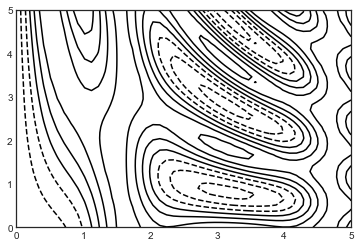

In [15]:
# Standard line-only plot:
plt.contour(X, Y, Z, colors='black');

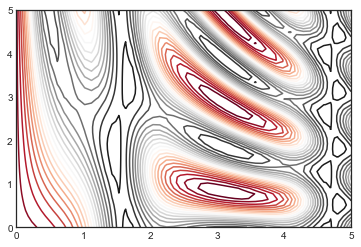

In [17]:
# Using cmap param
plt.contour(X, Y, Z, 20, cmap='RdGy');

Let's switch to a filled contour plot using the `plt.contourf()` function. 

Additionally, we'll add a `plt.colorbar()` command, which automatically creates an addittional axis with labeled color information for the plot:

Use this to cess available colors:
```python
plt.cm.<TAB>
```

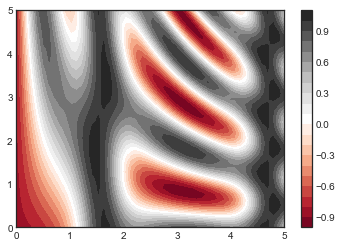

In [18]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the `plt.imshow()` function, which interprets a two-dimensional grid of data as an image.

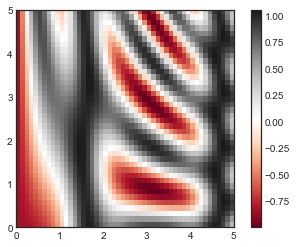

In [21]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (with transparency set via the `alpha` parameter) and overplot contours with labels on the contours themselves (using the `plt.clabel()` function):

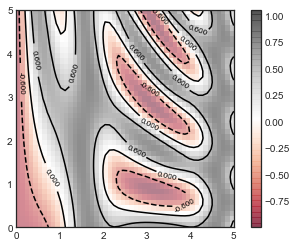

In [23]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', 
          cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—`plt.contour`, `plt.contourf`, and `plt.imshow`—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.